In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import struct

In [9]:
num_idx = str(100)

In [4]:
threshold = 1000

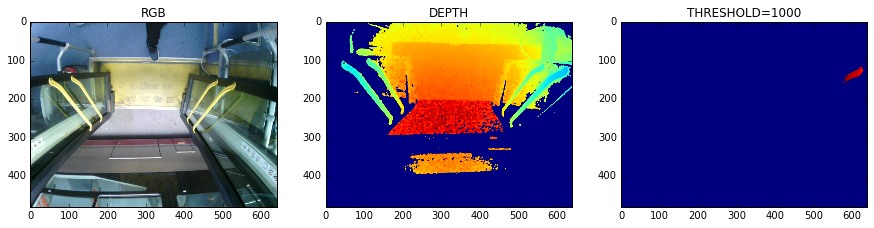

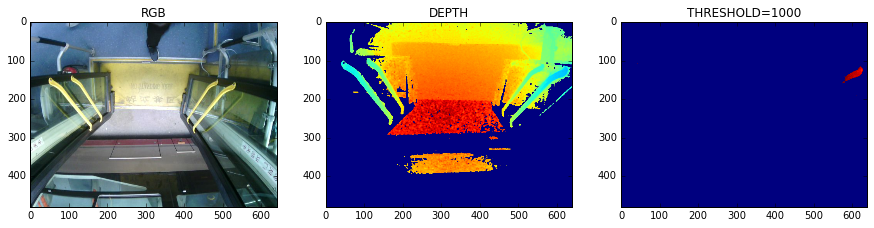

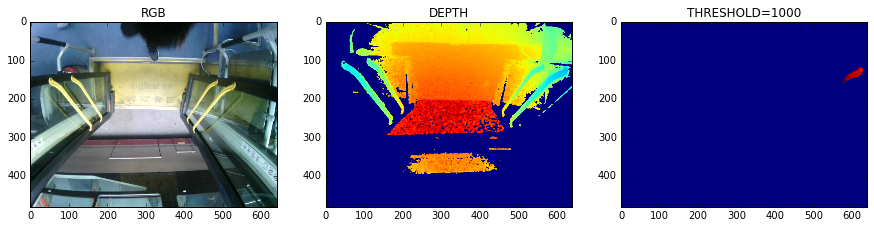

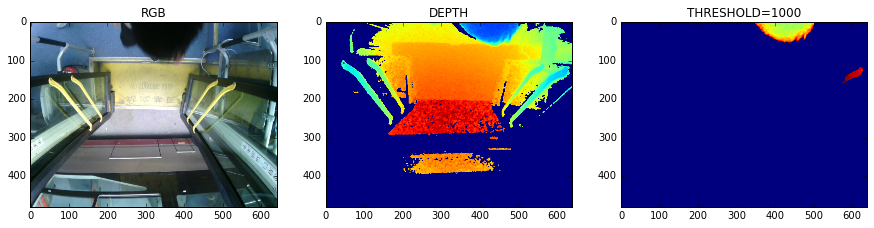

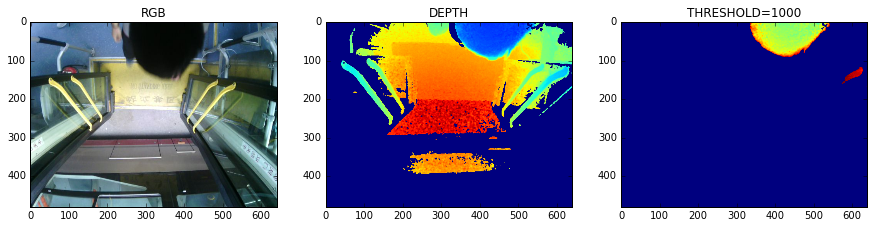

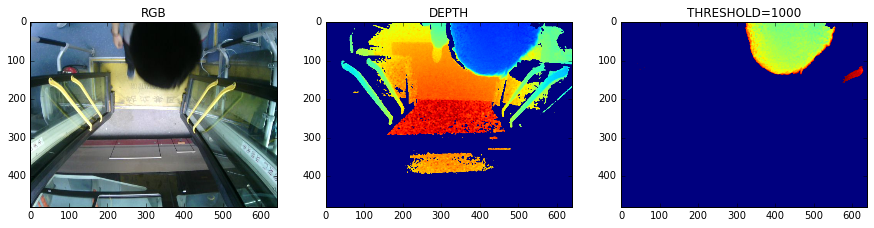

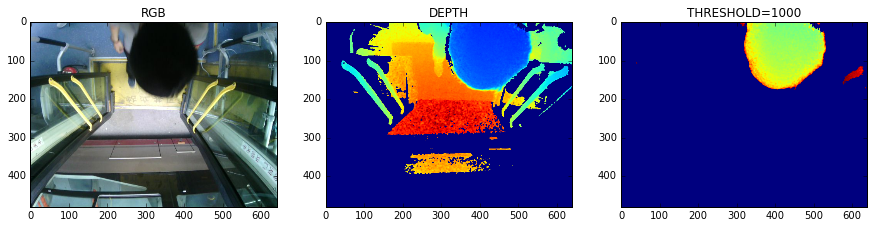

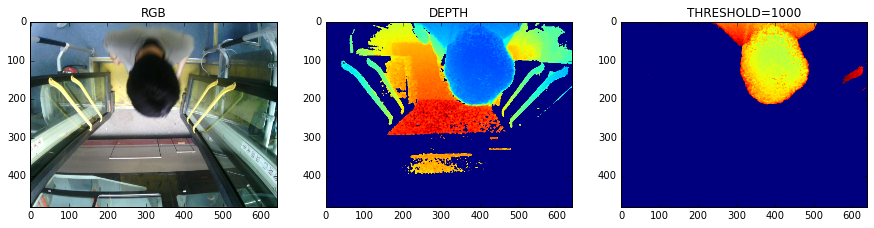

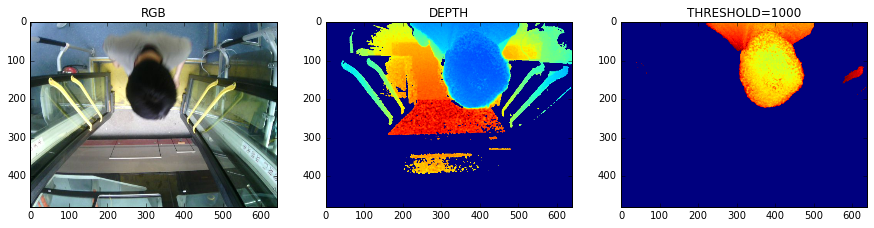

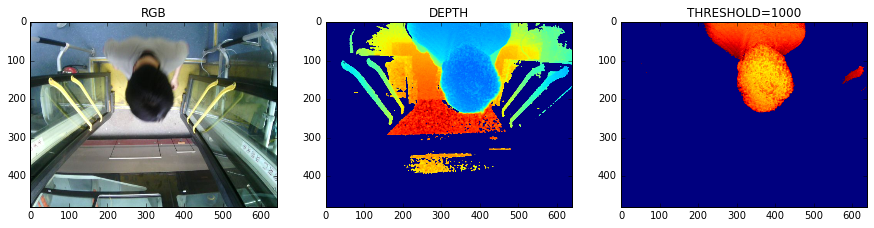

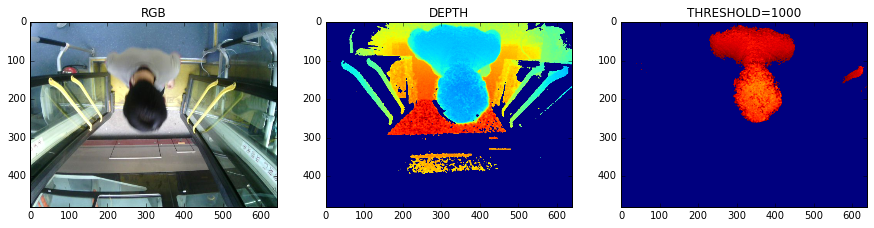

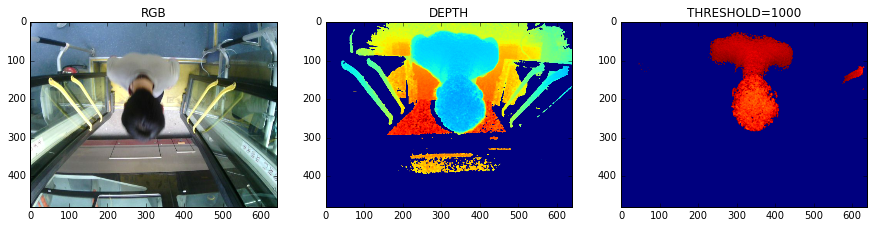

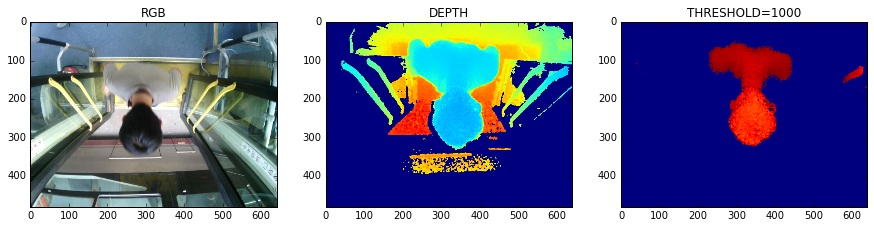

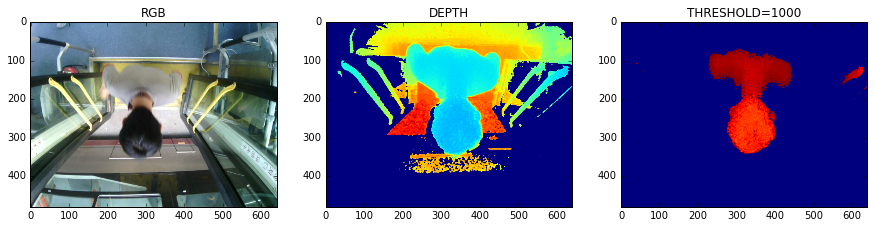

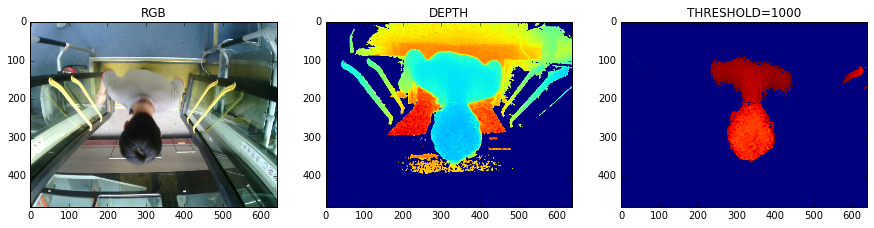

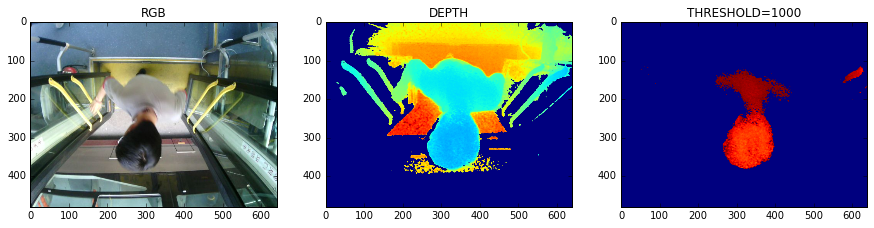

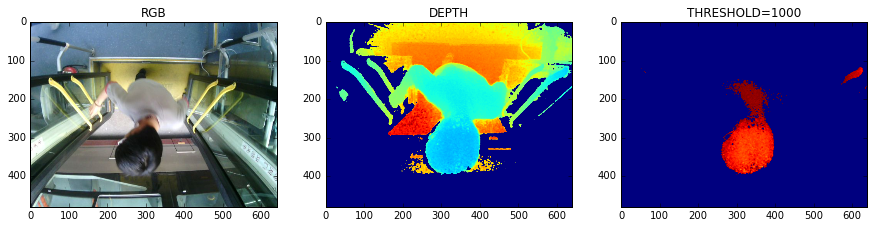

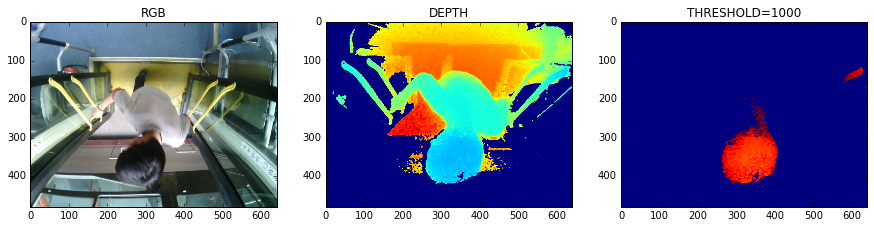

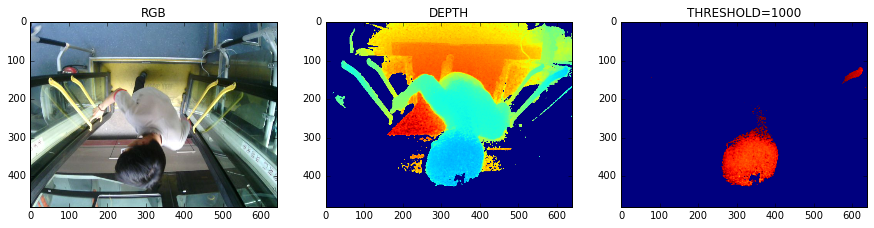

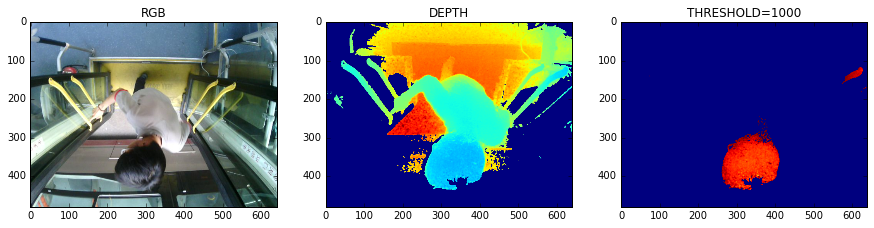

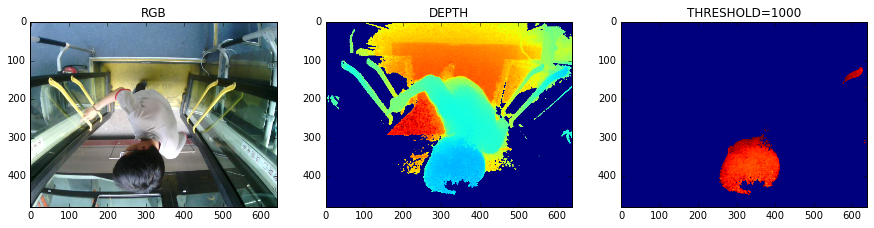

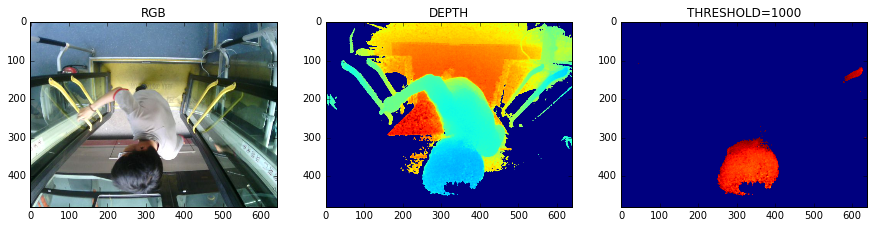

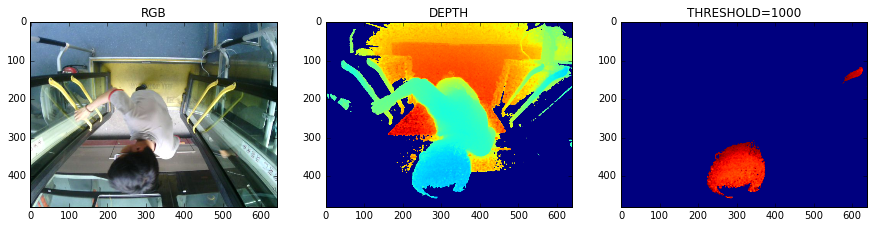

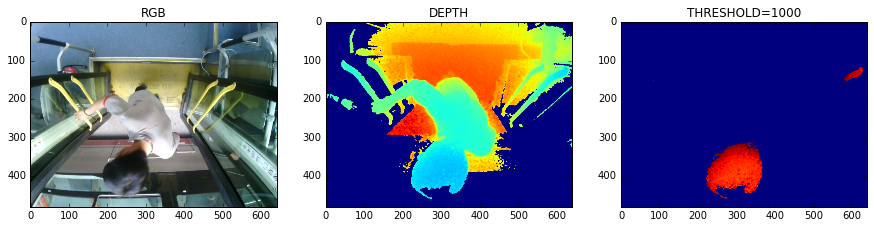

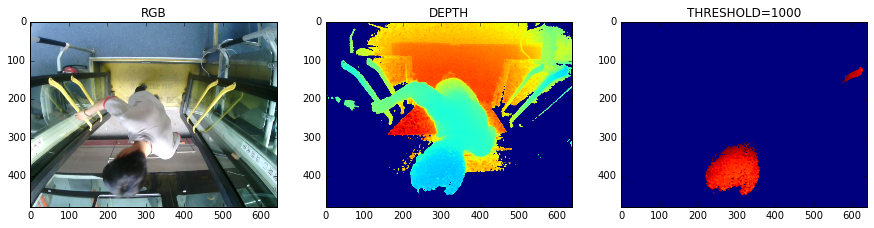

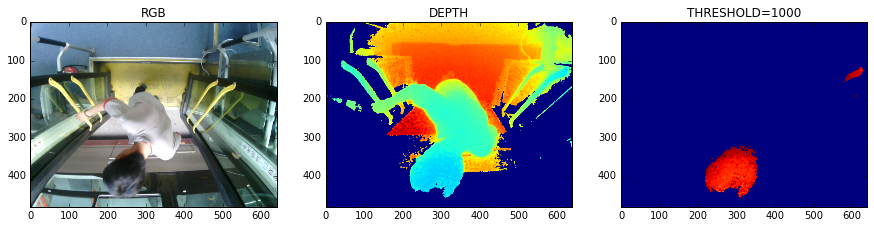

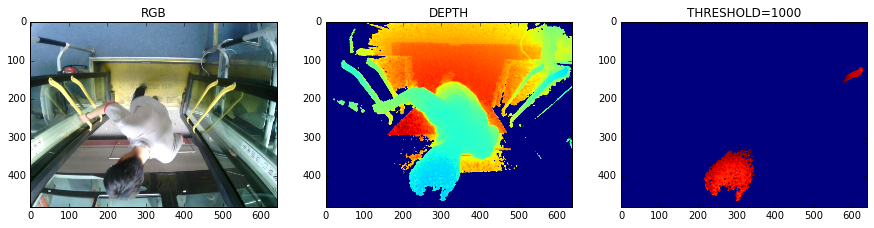

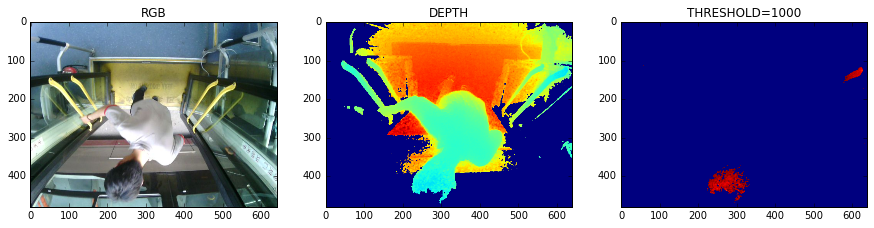

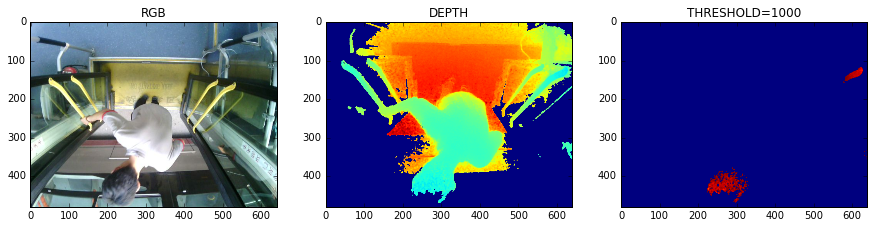

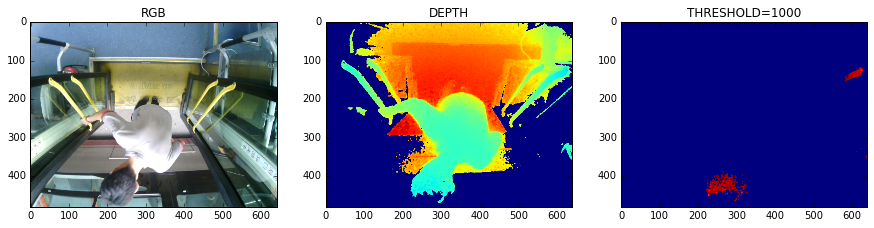

In [15]:
num_idxs = range(90,120)

for idx in num_idxs:
    data_str = []
    
    num_idx = str(idx)
    
    file_d_name = '/Users/nieka/Desktop/842/dispc_' + num_idx + '.jpg'
    file_rgb_name = '/Users/nieka/Desktop/image/842/rgb_' + num_idx + '.png'

    f = open(file_d_name,'rb')
    img_rgb = cv2.imread(file_rgb_name)

    try:
        while True:
            # short int, 2 bytes
            chunk = f.read(2)
            if not chunk:
                break
            data_str.append(chunk)
    finally:
        f.close()
    data_d = []

    for i in data_str:
        data_d.append(struct.unpack('<h', bytes(i))[0])

    img_d = np.array(data_d)

    img_d.shape = 480,640

    img_d_v = img_d.copy()
    img_d_v[img_d > threshold]=0

    #### vis result

    plt.close('all')
    f, axarr = plt.subplots(1,3, figsize=(15,15))
    axarr[0].imshow(img_rgb[:,:,::-1])
    axarr[0].set_title('RGB')
    axarr[1].imshow(img_d)
    axarr[1].set_title('DEPTH')
    axarr[2].imshow(img_d_v)
    axarr[2].set_title('THRESHOLD=' + str(threshold))
    plt.show()

#### depth data to colormap

```python
TableNum = 96
distancemin = 100
distancemax = 4000

colorMapcoef = TableNum / (distancemax - distancemin)

colortableindex = (z - distancemin) * colorMapcoef

ColorTableR = np.zeros(96, dtype=np.uint8)
ColorTableG = np.zeros(96, dtype=np.uint8)
ColorTableB = np.zeros(96, dtype=np.uint8)

for i in range(96):
    if i < 32:
        ColorTableR[i] = 255
        ColorTableG[i] = i * 8
        ColorTableB[i] = 0;
    elif i < 64:
        ColorTableR[i] = 255 - (i - 32) * 8
        ColorTableG[i] = 255
        ColorTableB[i] = (i - 32) * 8
    else:
        ColorTableR[i] = 0
        ColorTableG[i] = 255 - (i - 64) * 8
        ColorTableB[i] = 255
```